<a href="https://colab.research.google.com/github/rylan-berry/DataScienceExercises2025-2026/blob/main/RylaBerrU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install preliz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 6.5 MB/s eta 0:00:00


# Determining the Average Hit Rate of a Stormtrooper in the Star War Trillogy

## Context
In the Star Wars movies, the evil henchmen of the evil empire are the stormtroopers. Throughout Star Wars cannon, stormtroopers are notoriously bad shots. It has become a running joke among fans that stormtroopers can't hit a thing, especially main characters. But how acurate are stormtroopers against non-main characters?

## Prior and Previous Knowledge

When watching Star Wars movies, especially A New Hope, it becomes visually evident that stormtroopers laughably miss their shots, especially when it comes to trying to hit the main characters. Using Gemini's loose recollection of the internet about analysis of how accurate stormtroopers are, it was found that across the original Star Wars Trillogy, stormtroopers hit about 2.5% of their shots. And in the scene we're analysing, there's only one main character on in the location but is hidden when the fight breaks out, everyone else are rebel (the faction opposing the empire) grunts. We aren't very sure about the prior we'll give it little weight.

In [2]:
import preliz as pz

In [3]:
alpha_prior = .1
beta_prior = 3.9

In [4]:
prior = pz.Beta(alpha = alpha_prior, beta = beta_prior)

<Axes: >

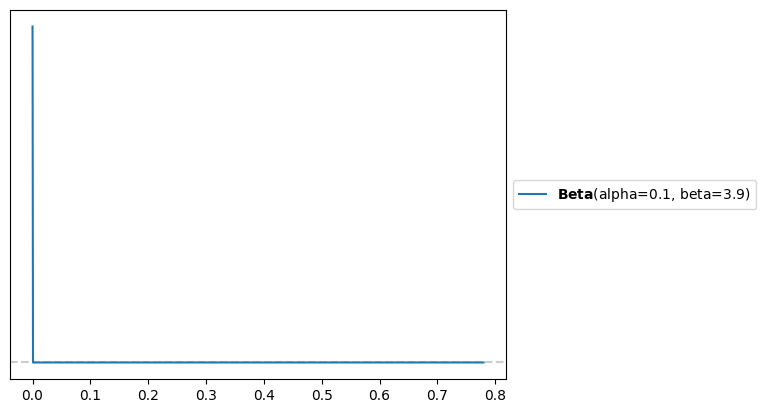

In [5]:
prior.plot_pdf()

In [6]:
prior.mean()

np.float64(0.025)

This is the prior, with the mean being 2.5%.

## Data and Data Collection

Due to the lack of accessible data that included misses *and* hits, I gathered my data via watching the opening sequence of A New Hope, the scene where stormtroopers are meant to be at their most meanacing. The rules for whether a shot hit or missed are as follows: A shot counts towards either counter only if we see where the shot landed, whether it be the wall or a person, we must clearly see where in frame the shot landed; A shot is counted as a hit when a person is clearly hit by a projectile, hits don't include a target falling over without seemingly being hit, for all we know they tripped; A shot also only counts as a miss when we see it hit something other than a desired target, such as a wall or floor, so this rule excludes any shots that go off screen. A note, these rules don't include whether we see the shooter or not (most of the time we don't), this is because we're assuming that projectiles going towards the rebels are coming from stormtroopers, since they are the only other group in the scene.

In [7]:
n = 37
k = 5

## Statistical Model

In [8]:
post = pz.Beta(alpha = alpha_prior + k, beta = n - k + beta_prior)

<Axes: >

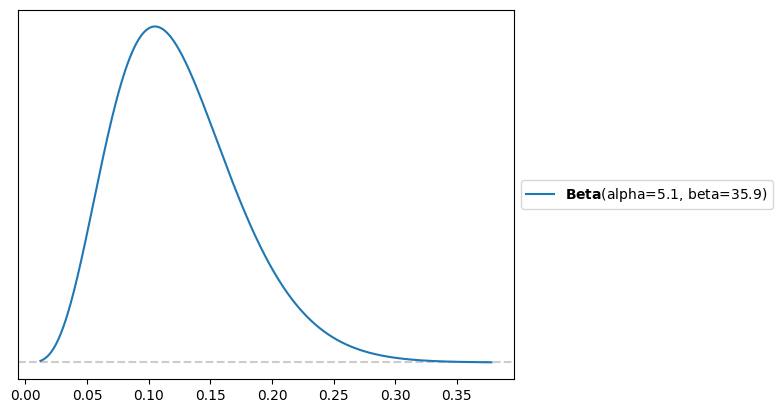

In [9]:
post.plot_pdf()

In [10]:
post.mean(), post.median(), post.mode()

(np.float64(0.12439024390243901),
 0.11827563105673057,
 np.float64(0.10512820512820512))

## PYMC Model

In [11]:
import numpy as np
import arviz as az
import pymc as pm

In [12]:
ST_hits = np.repeat(1, k)
ST_misses = np.repeat(0, n - k)
ST_data = np.concatenate( [ST_hits,ST_misses] )

In [ ]:
with pm.Model() as ST_hits_model:
  θ = pm.Beta('θ' , alpha = 1.0 * alpha_prior , beta = 1.0 * beta_prior)
  y = pm.Bernoulli('y', p = θ, observed = ST_data)
  idata_ST = pm.sample()

<Axes: title={'center': 'θ'}>

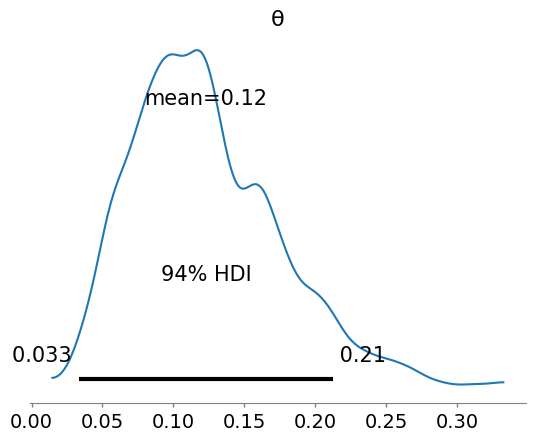

In [14]:
az.plot_posterior(idata_ST)

## Conclusion

Compared to the hit prediction from the prior, 2.5%, the stormtrooper acuracy found based on the data is between 3.3% to 21% hit rate, with a mean of 12%. This is showing that the assumtion of stormtrooper acuracy being extremely low is untrue, to the point where the collected data doesn't even show a 2.5% as a remote possibility. So, stormtroopers are more accurate than percieved. However, the data is collected from a single scene, in which stormtroopers are meant to come off as more fearsome, and part of that fearsomeness is being acurate. So the scene may not be completely reflective of the series as a whole.